In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Question**

I was having some trouble in the cell below. Originally I had the file path using single backslash characters instead of double and I was recieving a file not found error. 

I tried using double backslashes because I've had that fix similar problems before, and it fixed the issue. However I do not understand why this fixed the problem. 

I went through the filepath (from left to right) and added an extra backslash (one at a time) until it worked. I don't understand why two backslashes are required in certain locations while a single backslash works for others (as shown below, the last backslash is a single instead of double).  

In [2]:
df = pd.read_csv('C:\\Python\\Python37\\thinkful_data_sets\BTC_USD.csv')

In [3]:
print(df.head())

         Date         Open         High          Low        Close  \
0  2018-08-07  6945.770020  7150.859863  6685.020020  6723.209961   
1  2018-08-08  6723.290039  6723.990234  6133.029785  6285.020020   
2  2018-08-09  6285.060059  6631.229980  6195.020020  6543.240234   
3  2018-08-10  6543.250000  6582.140137  6025.910156  6153.410156   
4  2018-08-11  6152.950195  6488.549805  6014.259766  6242.540039   

     Adj Close     Volume  
0  6723.209961  575690006  
1  6285.020020  838853615  
2  6543.240234  575748446  
3  6153.410156  639457019  
4  6242.540039  545722619  


In [4]:
df['Range'] = df['High']-df['Low']

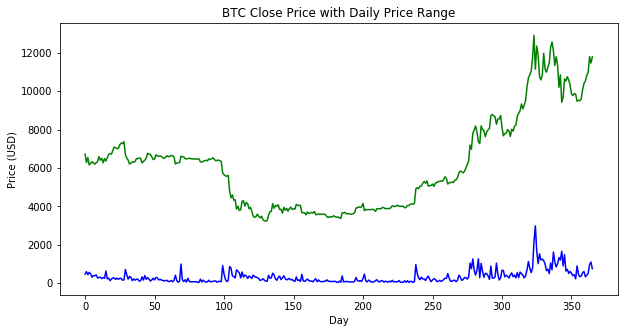

In [5]:
plt.figure(figsize=(10, 5))
plt.title('BTC Close Price with Daily Price Range')
plt.xlabel('Day')
plt.ylabel('Price (USD)')
plt.plot(df['Close'], color='green')
plt.plot(df['Range'], color='blue')
plt.show()

**Plot 1 Description:** The above visualization shows both the closing price and the range of daily price action over time. This gives us a sense of how the price of BTC has changed over time and which time periods were the most volatile.

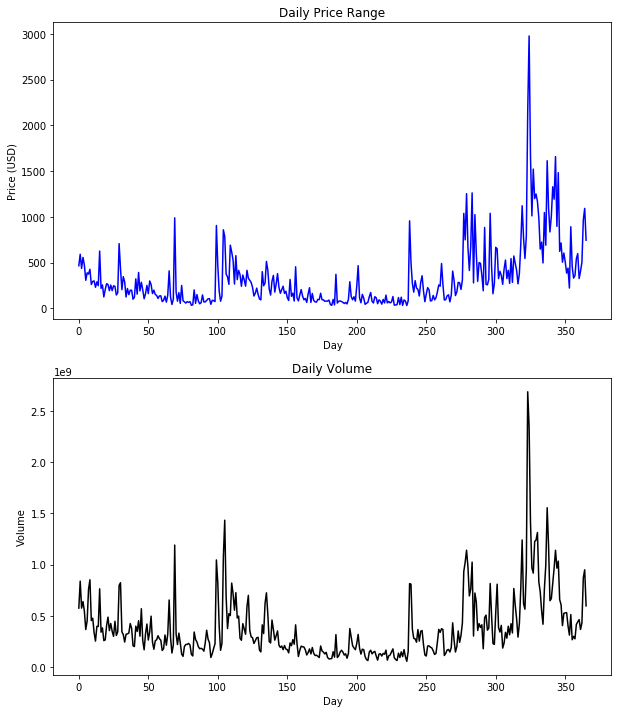

In [6]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(df['Range'], color='blue')
plt.title('Daily Price Range')
plt.xlabel('Day')
plt.ylabel('Price (USD)')

plt.subplot(2, 1, 2)
plt.plot(df['Volume'], color='black')
plt.title('Daily Volume')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.show()

**Plot 2 Description** The above visualization compares daily price range to the daily volume exchanged. This allows us to see that when we have significant spikes in volume we also tend to have a wider range of prices in a given day. 

In [7]:
df['Change'] = df['Open']-df['Close']
print(df['Change'].head())

0    222.560059
1    438.270019
2   -258.180175
3    389.839844
4    -89.589844
Name: Change, dtype: float64


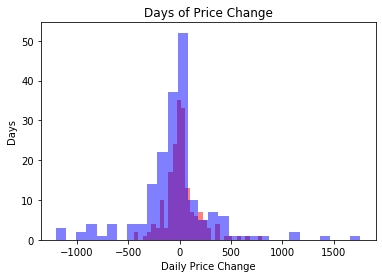

In [8]:
#plt.hist(df['Change'], bins=30, color='orange')
#plt.title('Price Change')
#plt.show()

plt.hist(df.loc[0:183,'Change'], bins=30, color='red', alpha=.5)
plt.hist(df.loc[183:,'Change'], bins=30, color='blue', alpha=.5)
plt.title('Days of Price Change') #not really sure what the proper title would be for the data being represented. 
plt.xlabel('Daily Price Change')
plt.ylabel('Days')
plt.show()

**Plot 3 Description:** This overlay of histograms tells us how many days the price icreased or decreased and by how much. The Red histogram plots the first 6 months of the year while the Blue plots the second half of the year. This allows us to compare change in market trends from the first half of the year to the second half of the year. 

In [9]:
df['Percent_Change'] = ((df['Close']-df['Open'])/df['Open'])*100
print(df['Percent_Change'].head())

0   -3.204253
1   -6.518684
2    4.107839
3   -5.957893
4    1.456047
Name: Percent_Change, dtype: float64


In [10]:
Q1 = df.loc[0:92, 'Percent_Change']
Q2 = df.loc[92:183, 'Percent_Change']
Q3 = df.loc[183:276, 'Percent_Change']
Q4 = df.loc[276:, 'Percent_Change']

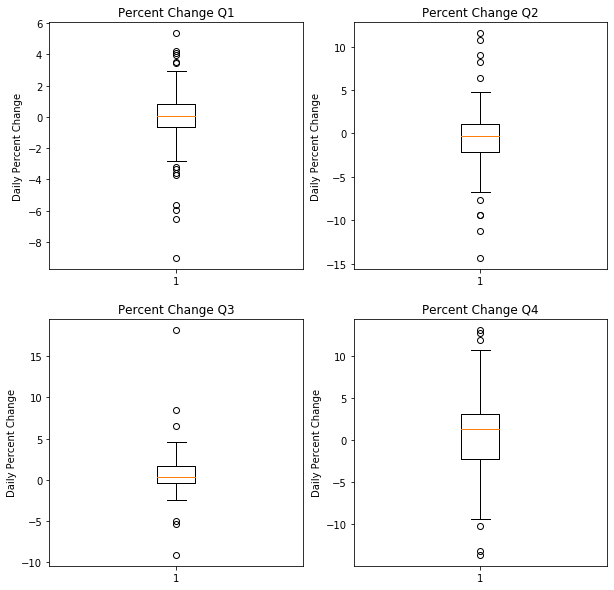

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.boxplot(Q1)
plt.title('Percent Change Q1')
plt.ylabel('Daily Percent Change')


plt.subplot(2, 2, 2)
plt.boxplot(Q2)
plt.title('Percent Change Q2')
plt.ylabel('Daily Percent Change')


plt.subplot(2, 2, 3)
plt.boxplot(Q3)
plt.title('Percent Change Q3')
plt.ylabel('Daily Percent Change')


plt.subplot(2, 2, 4)
plt.boxplot(Q4)
plt.title('Percent Change Q4')
plt.ylabel('Daily Percent Change')


plt.show()

**Plot 4 Description:** The boxplots above give us a sense of how the daily price percentage change behaves from quarter to quarter. We are able to see which quarter was the most consistent with price movement as well as which quarter had the largest outlier days that had larger swings in pricing.